In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1ª Questão:
Quais são os 10 locais (condados/cidades) com o maior percentual de pobreza geral dos Estados Unidos (Poverty Percent, All Ages)?


                    Name  Poverty Percent, All Ages
25           Mississippi                       21.0
19             Louisiana                       20.1
32            New Mexico                       19.1
9   District of Columbia                       18.5
18              Kentucky                       18.2
49         West Virginia                       17.9
1                Alabama                       17.2
4               Arkansas                       17.2
3                Arizona                       16.4
11               Georgia                       16.1



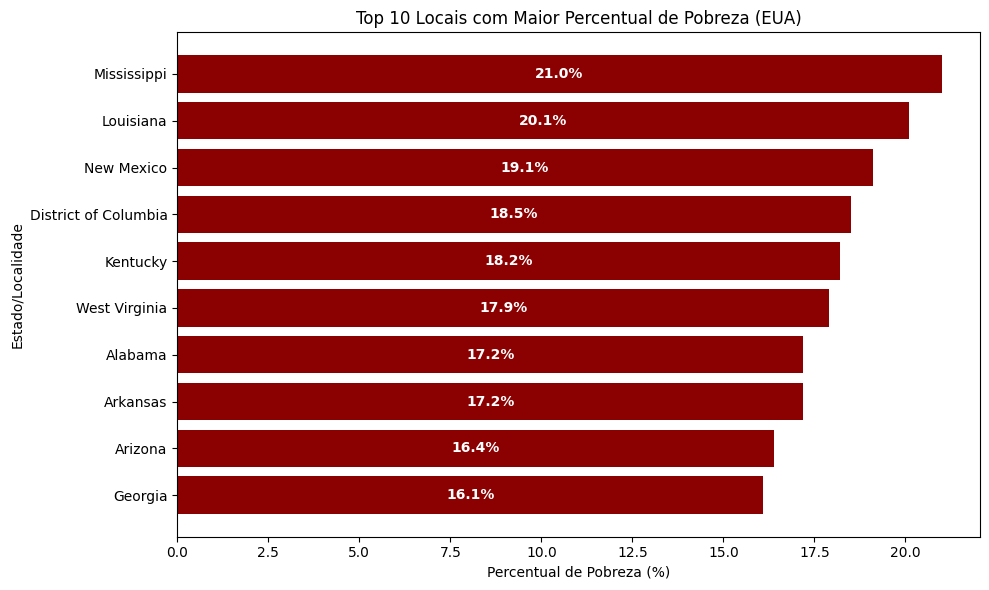

In [11]:
df = pd.read_csv("est16us.csv", delimiter=",", skiprows=1)

statesAndPercentyPoverty = df.iloc[1:, [2, 6]]
MostPoverty = statesAndPercentyPoverty.nlargest(10, "Poverty Percent, All Ages")
print(MostPoverty)
print("")

plt.figure(figsize=(10, 6))
plt.barh(MostPoverty["Name"], MostPoverty["Poverty Percent, All Ages"], color="darkred")
plt.xlabel("Percentual de Pobreza (%)")
plt.ylabel("Estado/Localidade")
plt.title("Top 10 Locais com Maior Percentual de Pobreza (EUA)")
for i, (name, value) in enumerate(
    zip(MostPoverty["Name"], MostPoverty["Poverty Percent, All Ages"])
):
    plt.text(
        value / 2,
        i,
        f"{value:.1f}%",
        va="center",
        ha="center",
        color="white",
        fontweight="bold",
        fontsize=10,
    )
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# 2ª Questão:
Quais são os 10 locais com a maior Renda Domiciliar Mediana (Median Household Income)?


                    Name  Median Household Income
21              Maryland                    78787
31            New Jersey                    76212
2                 Alaska                    76144
22         Massachusetts                    75207
12                Hawaii                    74659
9   District of Columbia                    74093
7            Connecticut                    73380
30         New Hampshire                    70986
47              Virginia                    68127
5             California                    67715



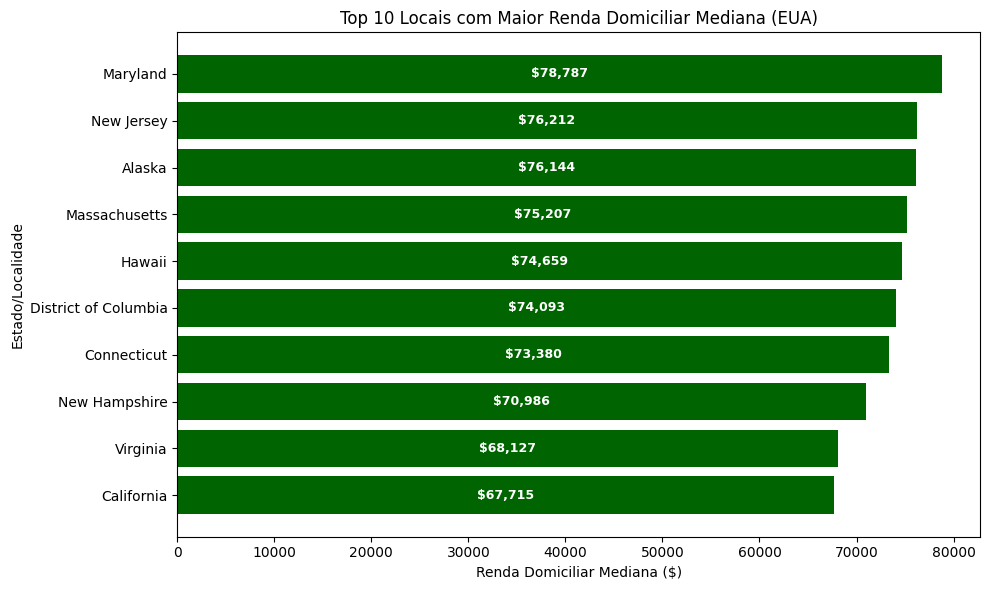

In [12]:
df = pd.read_csv("est16us.csv", delimiter=",", skiprows=1)

statesAndMedianHouseIncome = df.iloc[1:, [2, 21]]
MostMedianHouseIncome = statesAndMedianHouseIncome.nlargest(
    10, "Median Household Income"
)
print(MostMedianHouseIncome)
print("")

plt.figure(figsize=(10, 6))
bars = plt.barh(
    MostMedianHouseIncome["Name"],
    MostMedianHouseIncome["Median Household Income"],
    color="darkgreen",
)
plt.xlabel("Renda Domiciliar Mediana ($)")
plt.ylabel("Estado/Localidade")
plt.title("Top 10 Locais com Maior Renda Domiciliar Mediana (EUA)")

for i, (name, value) in enumerate(
    zip(MostMedianHouseIncome["Name"], MostMedianHouseIncome["Median Household Income"])
):
    plt.text(
        value / 2,
        i,
        f"${value:,.0f}",
        va="center",
        ha="center",
        color="white",
        fontweight="bold",
        fontsize=9,
    )

plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# 3ª Questão:
Quais são os 5 locais com o maior percentual de pobreza na primeira infância (Poverty Percent, Age 0-4)?

           Name  Poverty Percent, Age 0-4
25  Mississippi                      32.1
32   New Mexico                      31.4
19    Louisiana                      30.3
1       Alabama                      27.4
4      Arkansas                      27.3



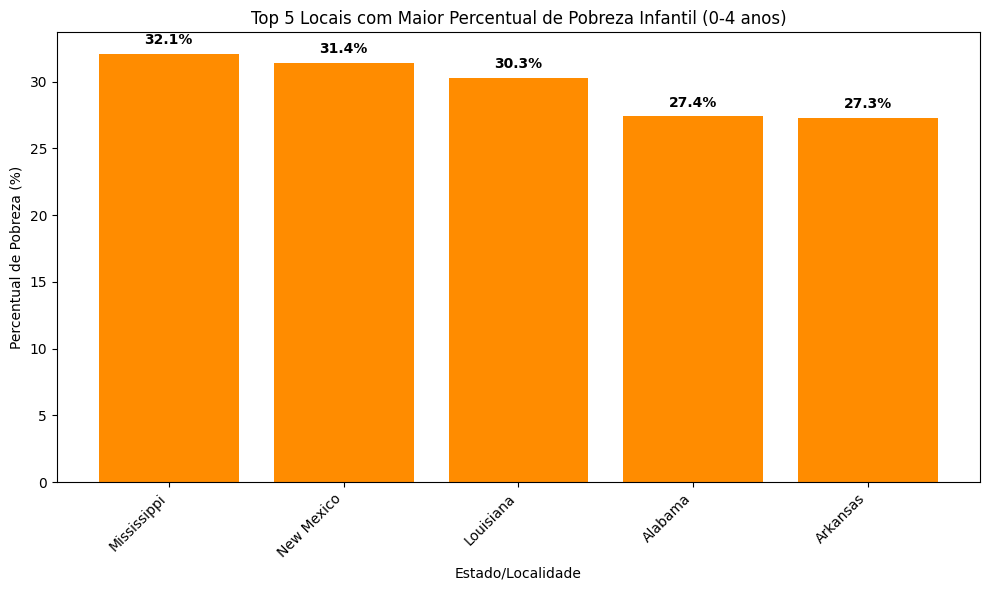

In [13]:
df = pd.read_csv("est16us.csv", delimiter=",", skiprows=1)

stateAndInfancyPoverty = df.iloc[1:, [2, 27]]
MostInfancyPoverty = stateAndInfancyPoverty.nlargest(5, "Poverty Percent, Age 0-4")
print(MostInfancyPoverty)
print("")

plt.figure(figsize=(10, 6))
bars = plt.bar(
    MostInfancyPoverty["Name"],
    MostInfancyPoverty["Poverty Percent, Age 0-4"],
    color="darkorange",
)
plt.xlabel("Estado/Localidade")
plt.ylabel("Percentual de Pobreza (%)")
plt.title("Top 5 Locais com Maior Percentual de Pobreza Infantil (0-4 anos)")

for i, (name, value) in enumerate(
    zip(MostInfancyPoverty["Name"], MostInfancyPoverty["Poverty Percent, Age 0-4"])
):
    plt.text(
        i,
        value + 0.5,
        f"{value:.1f}%",
        ha="center",
        va="bottom",
        fontweight="bold",
        fontsize=10,
    )

plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# 4ª Questão:
Quais os 3 locais em que a disparidade entre o percentual de pobreza infantil (Poverty Percent, Age 0-17) e o percentual de pobreza geral (Poverty Percent, All Ages) é maior?

                    Name  Disparity
25           Mississippi        9.2
9   District of Columbia        9.1
32            New Mexico        8.7



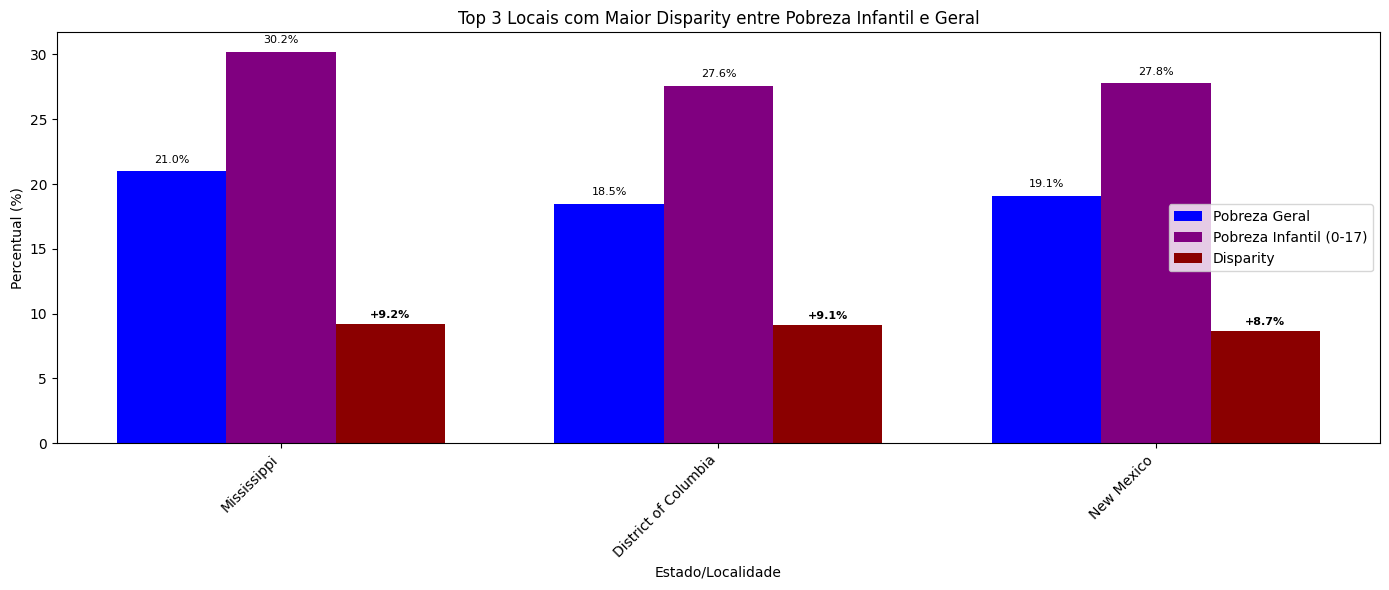

In [15]:
df = pd.read_csv("est16us.csv", delimiter=",", skiprows=1)

disparityData = df.iloc[1:, [2, 6, 12]].copy()
disparityData["Disparity"] = (
    disparityData["Poverty Percent, Age 0-17"]
    - disparityData["Poverty Percent, All Ages"]
)

MostDisparity = disparityData[["Name", "Disparity"]].nlargest(3, ["Disparity"])
print(MostDisparity)
print("")

graphData = disparityData.nlargest(3, "Disparity")

fig, ax = plt.subplots(figsize=(14, 6))
x = np.arange(len(graphData))
width = 0.25

bars1 = ax.bar(
    x - width,
    graphData["Poverty Percent, All Ages"],
    width,
    label="Pobreza Geral",
    color="blue",
)
bars2 = ax.bar(
    x,
    graphData["Poverty Percent, Age 0-17"],
    width,
    label="Pobreza Infantil (0-17)",
    color="purple",
)
bars3 = ax.bar(
    x + width,
    graphData["Disparity"],
    width,
    label="Disparity",
    color="darkred",
)

for i, v in enumerate(graphData["Poverty Percent, All Ages"]):
    ax.text(i - width, v + 0.5, f"{v:.1f}%", ha="center", va="bottom", fontsize=8)
for i, v in enumerate(graphData["Poverty Percent, Age 0-17"]):
    ax.text(i, v + 0.5, f"{v:.1f}%", ha="center", va="bottom", fontsize=8)
for i, v in enumerate(graphData["Disparity"]):
    ax.text(
        i + width,
        v + 0.3,
        f"+{v:.1f}%",
        ha="center",
        va="bottom",
        fontsize=8,
        fontweight="bold",
    )

ax.set_xlabel("Estado/Localidade")
ax.set_ylabel("Percentual (%)")
ax.set_title("Top 3 Locais com Maior Disparity entre Pobreza Infantil e Geral")
ax.set_xticks(x)
ax.set_xticklabels(graphData["Name"], rotation=45, ha="right")
ax.legend()

plt.tight_layout()
plt.show()

# 5ª Questão:
Em quais estados a taxa de pobreza em crianças de 0–4 anos é mais alta que a de 5–17 anos? Cite até 5 estados.

Existem 50 estados com pobreza de bebes alta:
- Alabama
- Alaska
- Arizona
- Arkansas
- California
- Colorado
- Connecticut
- Delaware
- Florida
- Georgia
- Hawaii
- Idaho
- Illinois
- Indiana
- Iowa
- Kansas
- Kentucky
- Louisiana
- Maine
- Maryland
- Massachusetts
- Michigan
- Minnesota
- Mississippi
- Missouri
- Montana
- Nebraska
- Nevada
- New Hampshire
- New Jersey
- New Mexico
- New York
- North Carolina
- North Dakota
- Ohio
- Oklahoma
- Oregon
- Pennsylvania
- Rhode Island
- South Carolina
- South Dakota
- Tennessee
- Texas
- Utah
- Vermont
- Virginia
- Washington
- West Virginia
- Wisconsin
- Wyoming

Existem 1 estados com pobreza na infância mais alta:
- District of Columbia



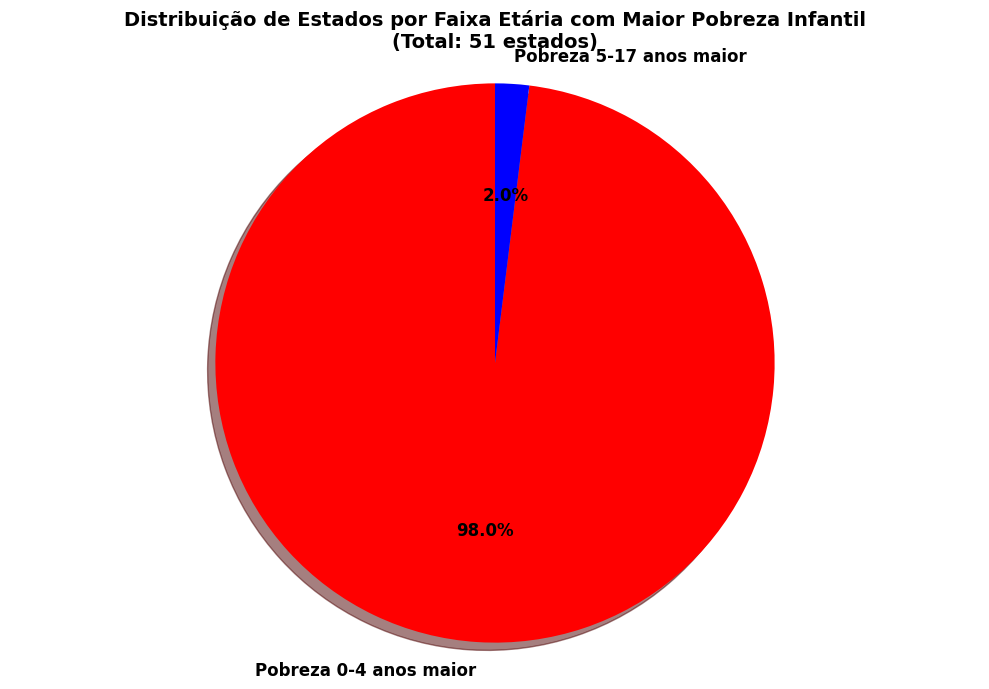

In [18]:
df = pd.read_csv("est16us.csv", delimiter=",", skiprows=1)

taxData = df.iloc[1:, [2, 18, 27]].copy()

taxData["High Poverty Babies"] = (
    taxData["Poverty Percent, Age 0-4"]
    > taxData["Poverty Percent, Age 5-17 in Families"]
)

highPovertyBabyStates = taxData["Name"][taxData["High Poverty Babies"] == True]
highSize = len(highPovertyBabyStates)

print(f"Existem {highSize} estados com pobreza de bebes alta:")
for state in highPovertyBabyStates:
    print(f"- {state}")
print("")

highPovertyInfantyStates = taxData["Name"][taxData["High Poverty Babies"] == False]
fiveToSeventeenSize = len(highPovertyInfantyStates)

print(f"Existem {fiveToSeventeenSize} estados com pobreza na infância mais alta:")
for state in highPovertyInfantyStates:
    print(f"- {state}")
print("")

sizes = [highSize, fiveToSeventeenSize]
labels = ["Pobreza 0-4 anos maior", "Pobreza 5-17 anos maior"]
colors = ["red", "blue"]

plt.figure(figsize=(10, 7))
plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct="%1.1f%%",
    shadow=True,
    startangle=90,
    textprops={"fontsize": 12, "fontweight": "bold"},
)
plt.title(
    f"Distribuição de Estados por Faixa Etária com Maior Pobreza Infantil\n(Total: {highSize + fiveToSeventeenSize} estados)",
    fontsize=14,
    fontweight="bold",
)
plt.axis("equal")
plt.tight_layout()
plt.show()

# 6ª Questão:
Quais estados têm alta renda mediana, mas também alta taxa de pobreza? Cite os 5 mais discrepantes.

             Name  Median Household Income  Poverty Percent, All Ages  \
25    Mississippi                    41793                       21.0   
19      Louisiana                    45374                       20.1   
49  West Virginia                    43175                       17.9   
32     New Mexico                    46844                       19.1   
18       Kentucky                    46610                       18.2   

    Discrepancy  
25    -1.000000  
19    -0.836036  
49    -0.731299  
32    -0.721673  
18    -0.660834  



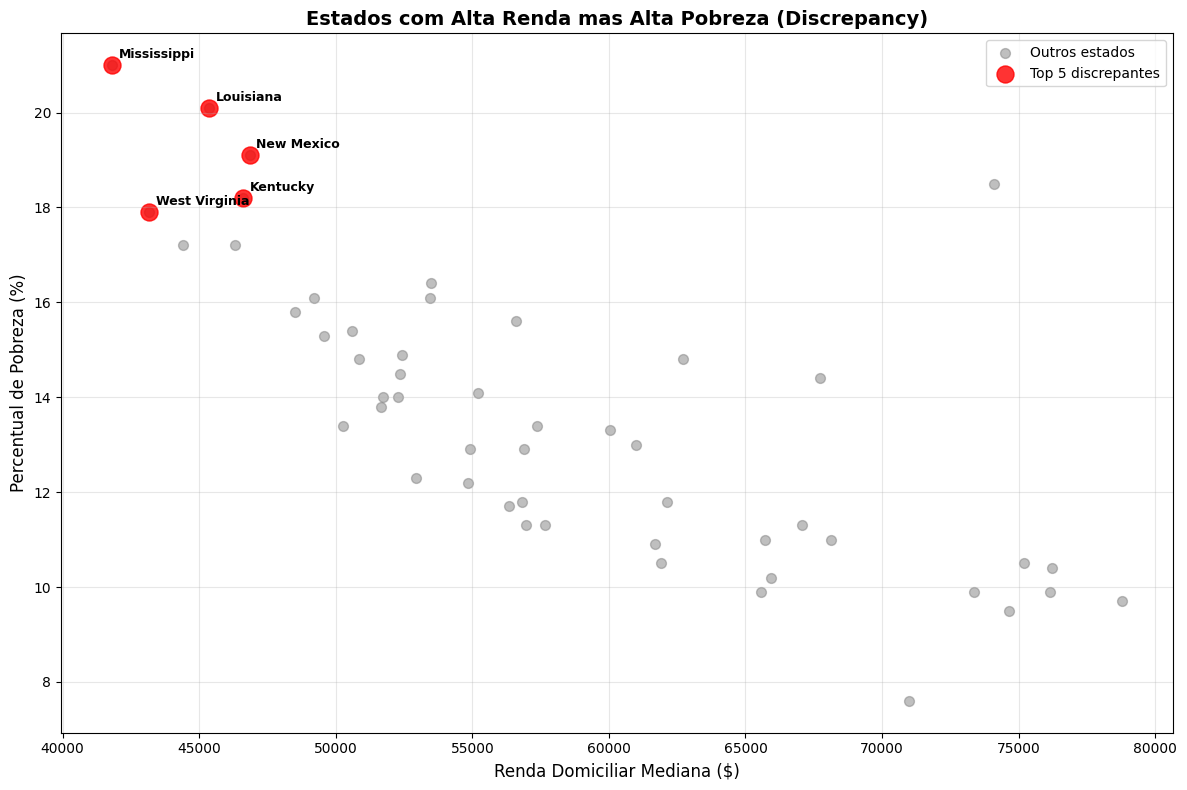

In [19]:
df = pd.read_csv("est16us.csv", delimiter=",", skiprows=1)

discrepancyData = df.iloc[1:, [2, 21, 6]].copy()

discrepancyData = discrepancyData.dropna()

# Normalizar dados (escala 0-1)
# É necessário normalizar porque as variáveis estão em escalas diferentes:
# - Renda: dezenas de milhares
# - Pobreza: percentagem
# Com normalização (0-1), ambas as variáveis terão o mesmo peso na comparação

discrepancyData["Normalized Income"] = (
    discrepancyData["Median Household Income"]
    - discrepancyData["Median Household Income"].min()
) / (
    discrepancyData["Median Household Income"].max()
    - discrepancyData["Median Household Income"].min()
)

discrepancyData["Normalized Poverty"] = (
    discrepancyData["Poverty Percent, All Ages"]
    - discrepancyData["Poverty Percent, All Ages"].min()
) / (
    discrepancyData["Poverty Percent, All Ages"].max()
    - discrepancyData["Poverty Percent, All Ages"].min()
)

# Quanto menor o valor, mais discrepante (alta renda mas muita pobreza)
discrepancyData["Discrepancy"] = (
    discrepancyData["Normalized Income"] - discrepancyData["Normalized Poverty"]
)

MostDiscrepant = discrepancyData.nsmallest(5, "Discrepancy")
print(
    MostDiscrepant[
        ["Name", "Median Household Income", "Poverty Percent, All Ages", "Discrepancy"]
    ]
)
print("")

plt.figure(figsize=(12, 8))

plt.scatter(
    discrepancyData["Median Household Income"],
    discrepancyData["Poverty Percent, All Ages"],
    alpha=0.5,
    s=50,
    color="gray",
    label="Outros estados",
)

plt.scatter(
    MostDiscrepant["Median Household Income"],
    MostDiscrepant["Poverty Percent, All Ages"],
    alpha=0.8,
    s=150,
    color="red",
    label="Top 5 discrepantes",
)

for idx, row in MostDiscrepant.iterrows():
    plt.annotate(
        row["Name"],
        (row["Median Household Income"], row["Poverty Percent, All Ages"]),
        xytext=(5, 5),
        textcoords="offset points",
        fontsize=9,
        fontweight="bold",
    )

plt.xlabel("Renda Domiciliar Mediana ($)", fontsize=12)
plt.ylabel("Percentual de Pobreza (%)", fontsize=12)
plt.title(
    "Estados com Alta Renda mas Alta Pobreza (Discrepancy)",
    fontsize=14,
    fontweight="bold",
)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 7ª Questão:
Existe algum padrão regional (por região dos EUA, por exemplo) na distribuição da pobreza?

25             Mississippi
19               Louisiana
32              New Mexico
9     District of Columbia
18                Kentucky
49           West Virginia
1                  Alabama
4                 Arkansas
3                  Arizona
11                 Georgia
Name: Name, dtype: object

              State Name     Region
0                Alabama      South
1                 Alaska       West
2                Arizona       West
3               Arkansas      South
4             California       West
5               Colorado       West
6            Connecticut  Northeast
7               Delaware      South
8   District of Columbia      South
9                Florida      South
10               Georgia      South
11                Hawaii       West
12                 Idaho       West
13              Illinois    Midwest
14               Indiana    Midwest
15                  Iowa    Midwest
16                Kansas    Midwest
17              Kentucky      South
18             Loui

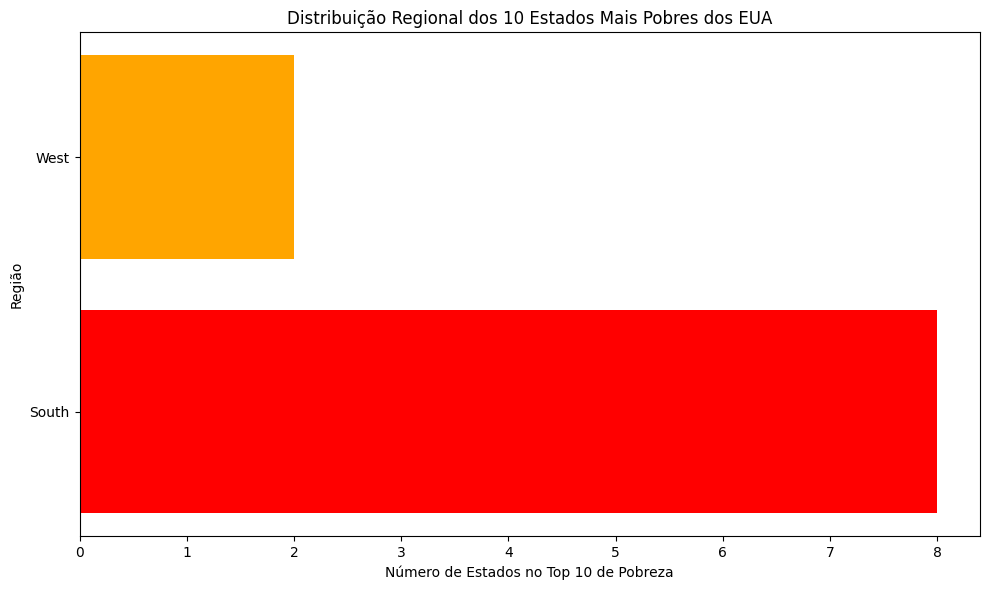

In [20]:
df = pd.read_csv("est16us.csv", delimiter=",", skiprows=1)
df2 = pd.read_csv("us_states_fips_regions.csv", delimiter=",")

reducedDf = df.iloc[1:, [2, 6]]

namesMostPoverty = reducedDf.nlargest(10, "Poverty Percent, All Ages")["Name"]
print(namesMostPoverty)
print("")

namesAndRegions = df2.loc[:, ["State Name", "Region"]]
print(namesAndRegions)
print("")

# .isin(namesMostPoverty): verifica se o nome do estado está na lista dos 10 mais pobres
regionsOfPoorest = namesAndRegions[namesAndRegions["State Name"].isin(namesMostPoverty)]
print(regionsOfPoorest)
print("")

regionCounts = regionsOfPoorest["Region"].value_counts()

plt.figure(figsize=(10, 6))
bars = plt.barh(regionCounts.index, regionCounts.values, color=["red", "orange"])
plt.xlabel("Número de Estados no Top 10 de Pobreza")
plt.ylabel("Região")
plt.title("Distribuição Regional dos 10 Estados Mais Pobres dos EUA")

plt.tight_layout()
plt.show()

# 8ª Questão:
Quantos estados estão abaixo da média da pobreza (Poverty Percent, All Ages)?

Quantidade de estados abaixo da média da pobreza: 27
Quantidade de estados acima da média da pobreza: 24



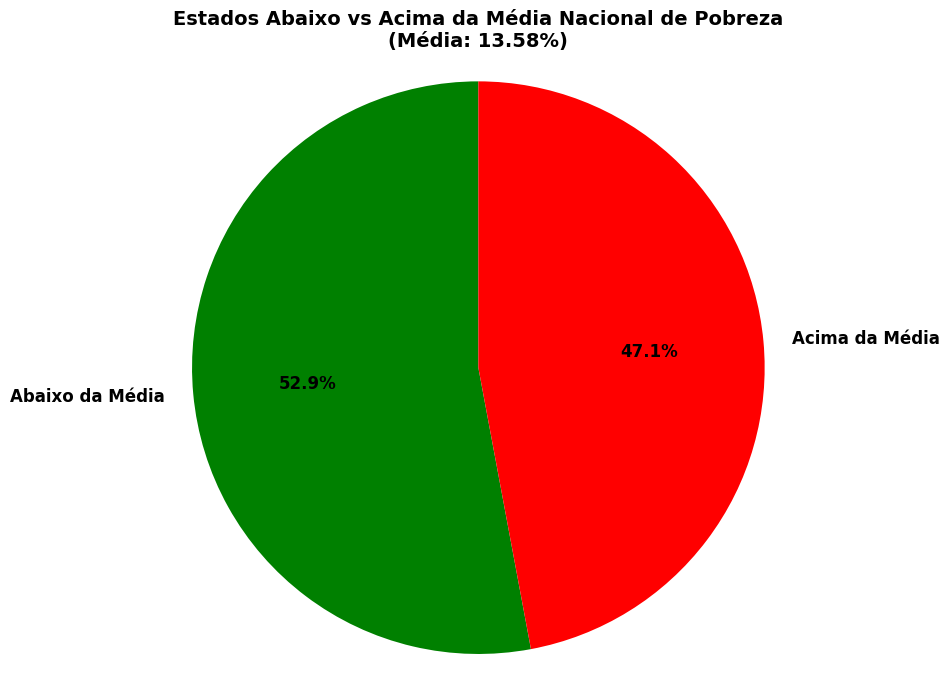

In [21]:
df = pd.read_csv("est16us.csv", delimiter=",", skiprows=1)

reducedDf = df.iloc[1:, [2, 6]].copy()
meanPoverty = reducedDf["Poverty Percent, All Ages"].mean()

quantityBelowAverage = len(
    reducedDf[reducedDf["Poverty Percent, All Ages"] < meanPoverty]
)
quantityAboveAverage = len(
    reducedDf[reducedDf["Poverty Percent, All Ages"] > meanPoverty]
)

print("Quantidade de estados abaixo da média da pobreza:", quantityBelowAverage)
print("Quantidade de estados acima da média da pobreza:", quantityAboveAverage)
print("")

sizes = [quantityBelowAverage, quantityAboveAverage]
labels = ["Abaixo da Média", "Acima da Média"]
colors = ["green", "red"]
explode = (0.05, 0.05)

plt.figure(figsize=(10, 7))
plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct="%1.1f%%",
    startangle=90,
    textprops={"fontsize": 12, "fontweight": "bold"},
)
plt.title(
    f"Estados Abaixo vs Acima da Média Nacional de Pobreza\n(Média: {meanPoverty:.2f}%)",
    fontsize=14,
    fontweight="bold",
)
plt.axis("equal")
plt.tight_layout()
plt.show()

# 9ª Questão:
Quais estados estão acima da renda domiciliar mediana?

Estados com renda domiciliar mediana acima da média dos EUA:
- Alaska
- California
- Colorado
- Connecticut
- Delaware
- District of Columbia
- Hawaii
- Illinois
- Maryland
- Massachusetts
- Minnesota
- New Hampshire
- New Jersey
- New York
- North Dakota
- Rhode Island
- Utah
- Virginia
- Washington
- Wyoming



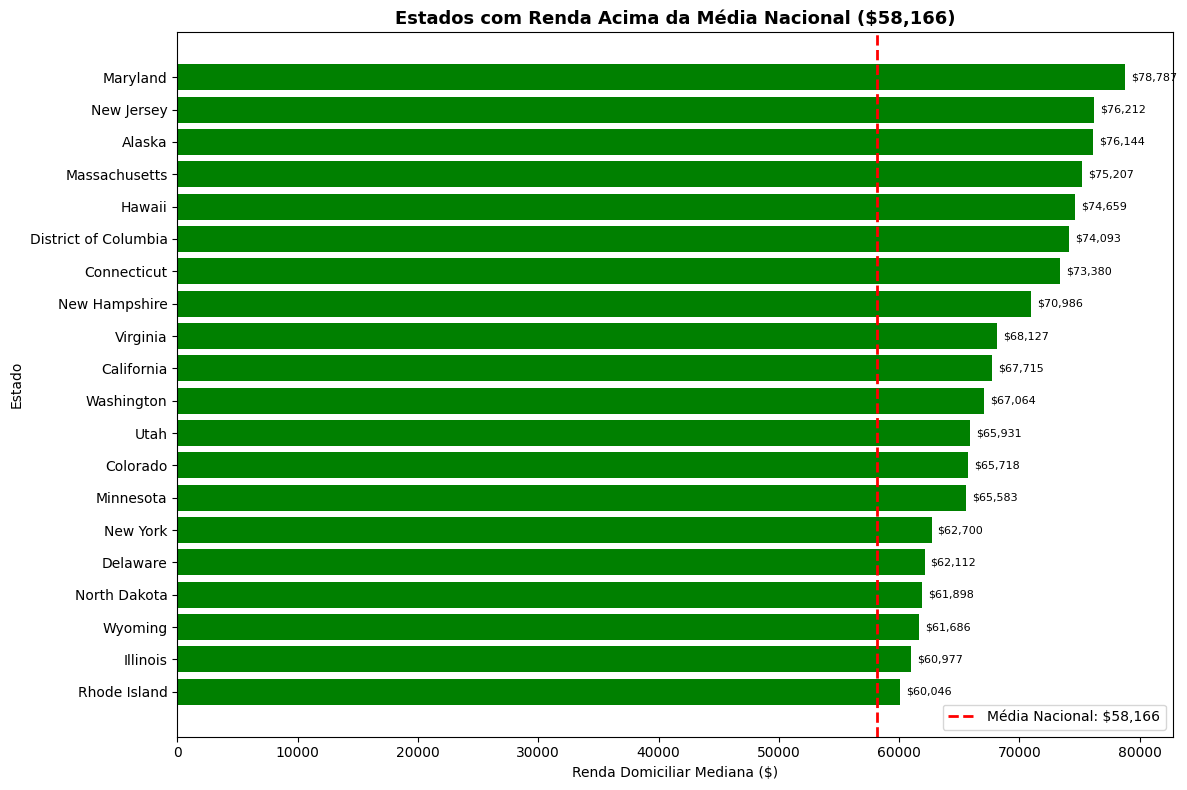

In [24]:
df = pd.read_csv("est16us.csv", delimiter=",", skiprows=1)

reducedDf = df.iloc[1:, [2, 21]].copy()
meanEUAHouseHoldIncome = reducedDf["Median Household Income"].mean()

statesAboveAverageIncome = reducedDf[
    reducedDf["Median Household Income"] > meanEUAHouseHoldIncome
]

print("Estados com renda domiciliar mediana acima da média dos EUA:")
for i in statesAboveAverageIncome["Name"]:
    print("-", i)
print("")

statesAboveData = statesAboveAverageIncome.sort_values(
    "Median Household Income", ascending=True
)

plt.figure(figsize=(12, 8))
bars = plt.barh(
    statesAboveData["Name"], statesAboveData["Median Household Income"], color="green"
)
plt.xlabel("Renda Domiciliar Mediana ($)")
plt.ylabel("Estado")
plt.title(
    f"Estados com Renda Acima da Média Nacional (${meanEUAHouseHoldIncome:,.0f})",
    fontsize=13,
    fontweight="bold",
)

plt.axvline(
    x=meanEUAHouseHoldIncome,
    color="red",
    linestyle="--",
    linewidth=2,
    label=f"Média Nacional: ${meanEUAHouseHoldIncome:,.0f}",
)

for i, (name, value) in enumerate(
    zip(statesAboveData["Name"], statesAboveData["Median Household Income"])
):
    plt.text(value + 500, i, f"${value:,.0f}", va="center", fontsize=8)

plt.legend()
plt.tight_layout()
plt.show()

# 10ª Questão:
Quais estados têm maior incerteza nas estimativas de pobreza (maior diferença entre limites superior e inferior do CI 90%)?

         Name  90% CI Lower Bound.1  90% CI Upper Bound.1
1     Alabama                  16.8                  17.6
2      Alaska                   9.3                  10.5
3     Arizona                  16.1                  16.7
4    Arkansas                  16.8                  17.6
5  California                  14.3                  14.5

Top 5 estados com maior incerteza:
                    Name  90% CI Lower Bound.1  90% CI Upper Bound.1  \
9   District of Columbia                  17.5                  19.5   
51               Wyoming                  10.2                  11.6   
13                 Idaho                  13.2                  14.4   
40          Rhode Island                  12.7                  13.9   
46               Vermont                  10.7                  11.9   

    Uncertainty  
9           2.0  
51          1.4  
13          1.2  
40          1.2  
46          1.2  



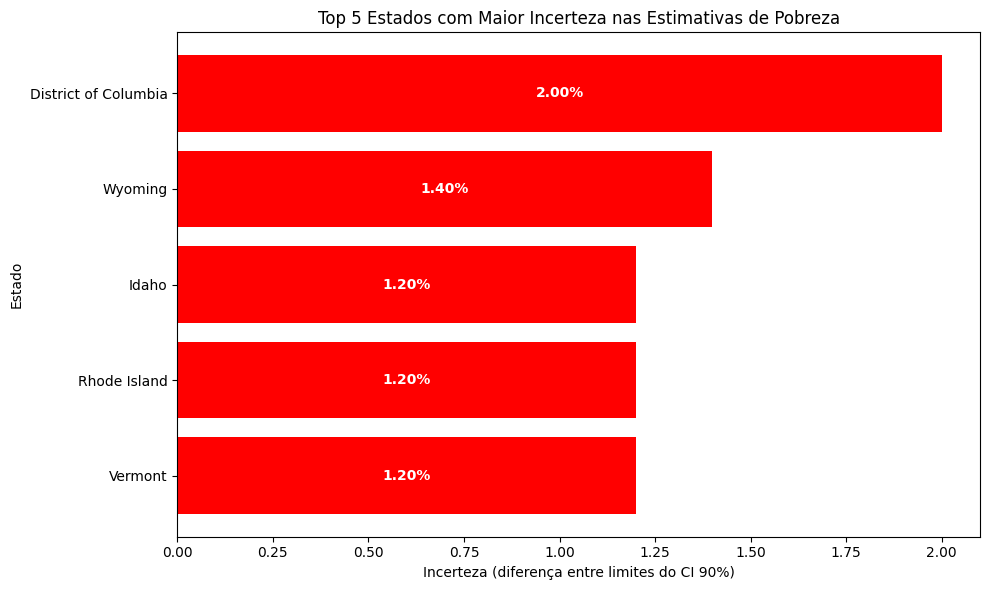

In [26]:
df = pd.read_csv("est16us.csv", delimiter=",", skiprows=1)

uncertaintyData = df.iloc[1:, [2, 7, 8]].copy()
print(uncertaintyData.head())
print("")

uncertaintyData["Uncertainty"] = uncertaintyData.iloc[:, 2] - uncertaintyData.iloc[:, 1]

MostUncertain = uncertaintyData.nlargest(5, "Uncertainty")
print("Top 5 estados com maior incerteza:")
print(MostUncertain)
print("")

plt.figure(figsize=(10, 6))
plt.barh(MostUncertain["Name"], MostUncertain["Uncertainty"], color="red")
plt.xlabel("Incerteza (diferença entre limites do CI 90%)")
plt.ylabel("Estado")
plt.title("Top 5 Estados com Maior Incerteza nas Estimativas de Pobreza")

for i, (name, value) in enumerate(
    zip(MostUncertain["Name"], MostUncertain["Uncertainty"])
):
    plt.text(
        value / 2,
        i,
        f"{value:.2f}%",
        va="center",
        ha="center",
        color="white",
        fontweight="bold",
        fontsize=10,
    )

plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()